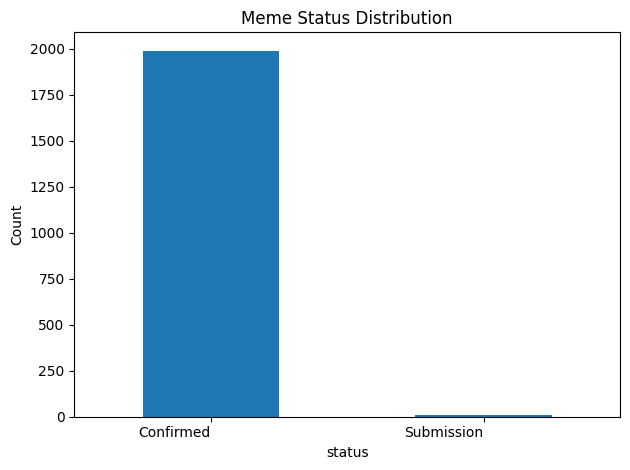

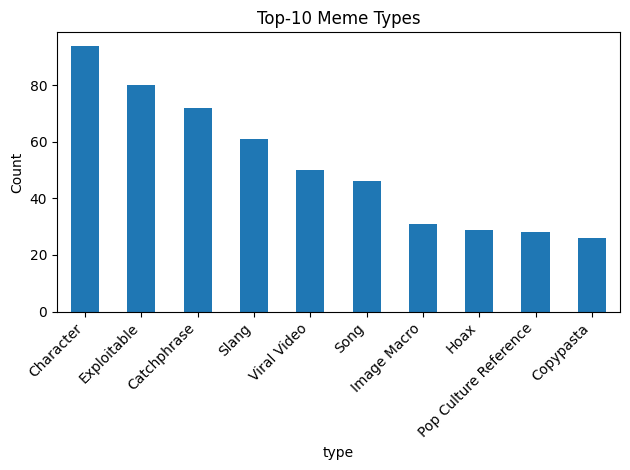

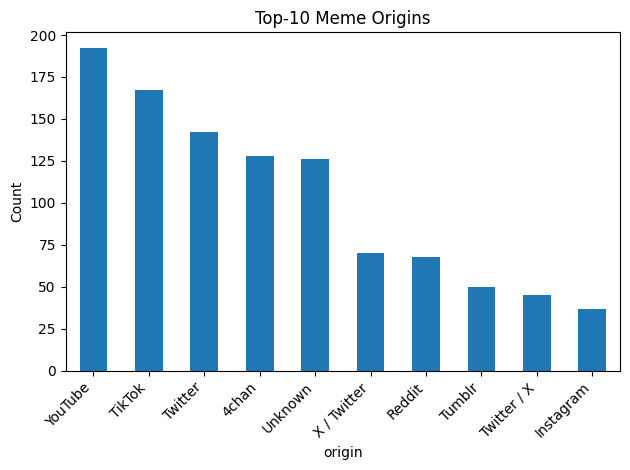

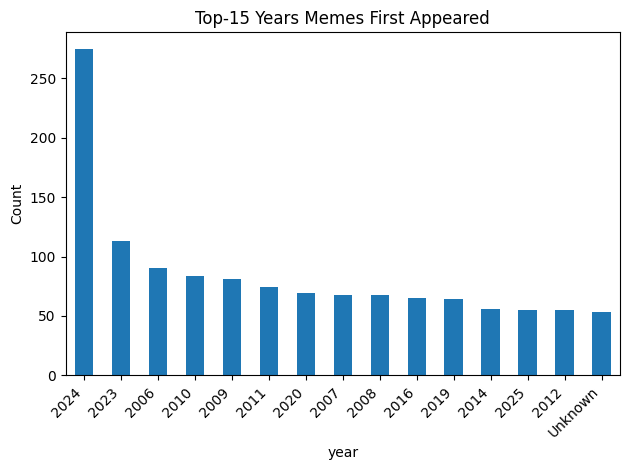

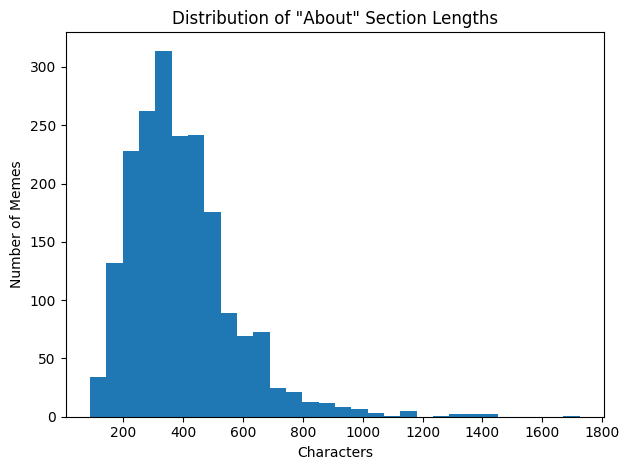

In [1]:
# ---------- setup ----------
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("kym_entries_full_try2.csv")

# helper
def bar_chart(series, title, top_n=10, rot=45):
    counts = series.value_counts(dropna=True).head(top_n)
    plt.figure()
    counts.plot(kind="bar")
    plt.title(title)
    plt.ylabel("Count")
    plt.xticks(rotation=rot, ha="right")
    plt.tight_layout()
    plt.show()

# 1) Status distribution
bar_chart(df["status"], "Meme Status Distribution", top_n=len(df["status"].value_counts()), rot=0)

# 2) Top-10 meme types
bar_chart(df["type"], "Top-10 Meme Types")

# 3) Top-10 meme origins
bar_chart(df["origin"], "Top-10 Meme Origins")

# 4) Top-15 first-appearance years
bar_chart(df["year"], "Top-15 Years Memes First Appeared", top_n=15)

# 5) Histogram of 'about' section lengths
about_len = df["about"].dropna().str.len()
plt.figure()
plt.hist(about_len, bins=30)
plt.title('Distribution of "About" Section Lengths')
plt.xlabel("Characters")
plt.ylabel("Number of Memes")
plt.tight_layout()
plt.show()


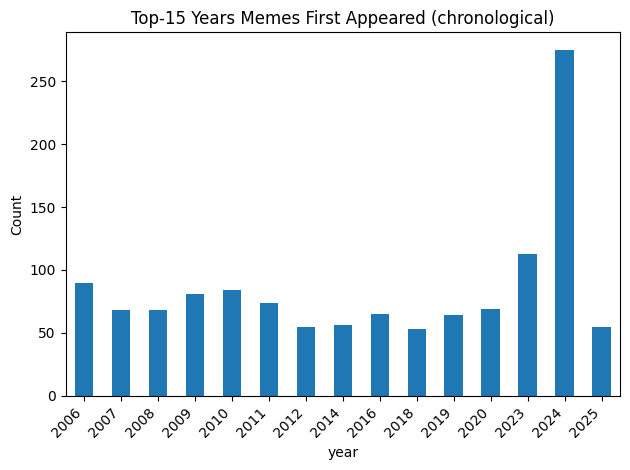

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- chronological year chart (top-15 by frequency) ----------
year_counts = (
    pd.to_numeric(df["year"], errors="coerce")   # "Unknown" → NaN
      .dropna()
      .astype(int)
      .value_counts()            # frequency table
      .sort_values(ascending=False)  # pick the most common first …
      .head(15)                      # … top-15 years overall
      .sort_index()                  # finally put them in chronological order
)

plt.figure()
year_counts.plot(kind="bar")
plt.title("Top-15 Years Memes First Appeared (chronological)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
